# "Pre-lecture" HW [completion prior to next LEC is suggested but not mandatory]
To prepare for this weeks lecture, first watch this video introduction to bootstrapping

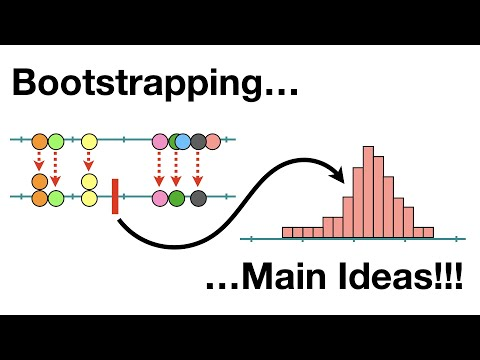

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Marking Rubric (which may award partial credit)
[0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
[0.2 points]: Evaluation of correctness and effectiveness of written communication for Question "1"
[0.3 points]: Evaluation of correctness and effectiveness of written communication for Question "6"
[0.4 points]: Evaluation of submission for Question "8"

## 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

**Session summary with NotebookLM and ChatGPT located in question 4**

The standard deviation is calculated as the square-root of the variance within the original data set. When talking about the "standard deviation" of the original data set, you are directly referring to the spread of the original data. Here, the standard deviation is a metric used to estimate approximately where most of the original data lies. On the other hand, the standard error of the mean is calculated by dividing the standard deviation of the original data by the square root of the size of the original data. This value represents the variability of the sample means and also acts as the estimated standard deviation of the sample means. When finding the standard error of the mean, you are not saying anything directly about the original set of data, but instead are describing the variability of the sample means.


## 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

**Session summary with NotebookLM and ChatGPT located in question 4**

To create a 95% confidence interval that would approximately capture 95% of the sample means, we would need to find an interval that approximates 2 standard deviations of the bootstrapped data. This would be equivalent to an interval consisting of plus minus `1.96` times the standard error of the mean. We can find this value by find calculating the mean and standard deviation of the original data, then calculate the standard error of the mean by dividing the standard deviation by the square-root of the sample size, and finally mark the interval `1.96` times the standard error of the mean below and above the mean.

## 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

**Session summary with NotebookLM and ChatGPT located in question 4**

Instead of using the standard deviation to calculate a confidence interval, we can use the `.quantile()` method from numpy to calculate the bottom `2.5` percent and top `97.5` percent of the bootstrapped data. Then, any data that lies between those two points will be within the `95` percent confidence interval. This approach works even when the bootstrapped data does not closely follow a normal distribution, such as a multi-modal or skewed distribution.

## 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

Session link with ChatGPT: https://chatgpt.com/share/66f9e917-13fc-8012-ade7-59835d582b6e

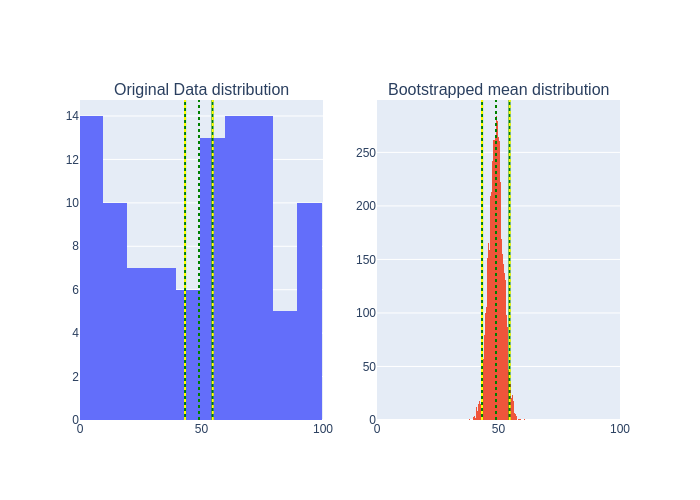

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set the size and range of the original sample
sample_size = 100
value_range = [0, 100]

# Generate the original data using parameters above
original_sample = np.random.choice(value_range[1], sample_size) - value_range[0]

# Set the number of bootstrapping repetitions
bootstrap_amount = 10000
bootstrapped_data = np.array([])
for _ in range(bootstrap_amount):
    # Create a bootstrapped population sampling from the orignal data with replacement
    bootstrapped_sample = np.random.choice(original_sample, sample_size)
    bootstrapped_data = np.append(bootstrapped_data, bootstrapped_sample.mean()) # Here you can change the value you are attempting to calculate
    # Example: bootstrapped_data = np.append(bootstrapped_data, bootstrapped_sample.median())

fig = make_subplots(rows=1, cols=2, subplot_titles=("Original Data distribution", "Bootstrapped mean distribution"))

fig.add_trace(go.Histogram(x=original_sample), row=1, col=1)
fig.add_trace(go.Histogram(x=bootstrapped_data), row=1, col=2)

# Add vertical lines indicating the mean of each set of data
fig.add_vline(original_sample.mean(), line_dash="dot", line_color="green", row=1, col=1)
fig.add_vline(bootstrapped_data.mean(), line_dash="dot", line_color="green", row=1, col=2)

# Use np.quantile to find the inner 95% of the bootstrapped means and add solid green vertical lines to both graphs
# On the bootstrapped distribution graph, these lines indicate where 2.5% and 97.5% of the data lie before
# On the original distribution, these lines indicate the 95% confidence interval for the mean
fig.add_vline(np.quantile(bootstrapped_data, 0.025), line_dash="solid", line_color="green")
fig.add_vline(np.quantile(bootstrapped_data, 0.975), line_dash="solid", line_color="green")

# Using the SEM to estimate the 95% confidence interval instead of using np.quantile
sem = original_sample.std() / (sample_size ** 0.5)
fig.add_vline(original_sample.mean() + 1.96 * sem, line_dash="dot", line_color="yellow")
fig.add_vline(original_sample.mean() - 1.96 * sem, line_dash="dot", line_color="yellow")

fig.update_layout(showlegend=False)

fig.update_xaxes(range=value_range)
fig.show(renderer="png")

### NotebookLM Q1-Q4 Interaction Summary
##### Summary of Standard Deviation, Standard Error and Confidence Intervals

Today, we discussed the differences between the standard deviation of a dataset, the standard error of the mean, and how to create confidence intervals using bootstrapping.

*   The **standard deviation of the original data** shows how spread out individual data points are from the sample mean (x̄). A larger standard deviation means the data points are more spread out, while a smaller standard deviation indicates that they are more clustered around the sample mean. 
*   The **standard error of the mean** reveals the variability you can expect in the sample mean itself if you were to take multiple samples from the same population. It effectively measures the reliability of the sample mean as an estimate of the true population mean.  As the sample size increases, the standard error of the mean decreases.

In the context of bootstrapping, the standard deviation of the original data is calculated from the initial sample. The standard error of the mean is often approximated by calculating the standard deviation of the bootstrapped sample means.

To create a 95% confidence interval using the standard error of the mean, you would first calculate the mean of the bootstrapped means. Then, you would calculate the standard deviation of the bootstrapped means, which estimates the standard error of the mean. Finally, you would mark the interval two standard deviations below and above the mean. This works because of the Central Limit Theorem, which states that the distribution of sample means tends to be approximately normal. As a result, roughly 95% of the data will fall within two standard deviations of the mean, as described by the Empirical Rule. 

Alternatively, you can create a 95% bootstrapped confidence interval by calculating the 2.5th and 97.5th percentiles of the bootstrapped means using the `.quantile()` method from NumPy. This method does not depend on the assumption of normality and directly utilizes the results from the bootstrapping simulations.


### ChatGPT Summary of the Interaction:

The conversation revolved around the student’s understanding of **bootstrapping** and how to use it to create **confidence intervals**, particularly focusing on the **95% confidence interval**. The student initially provided responses to questions related to key concepts like **standard error of the mean (SEM)**, **standard deviation (SD)**, and how bootstrapping can be applied to calculate confidence intervals without assuming normality.

### Key Concepts Covered:

1. **Standard Error of the Mean (SEM) vs. Standard Deviation (SD):**
   - The student explained the difference between the **SEM** (which measures the variability of the sample means) and the **SD** (which measures the spread of the original data). The SEM is calculated as the SD divided by the square root of the sample size.

2. **Using SEM to Create a Confidence Interval:**
   - The student learned how to construct a **95% confidence interval** using **1.96 times the SEM**, which approximates the range that would capture 95% of the sample means under the assumption of normality.

3. **Creating Confidence Intervals Using Bootstrapping:**
   - The student explained how to use the **2.5th and 97.5th percentiles** of bootstrapped data to create a **95% confidence interval** without relying on the SEM. This method works well when the bootstrapped data doesn’t follow a normal distribution, such as in skewed or multi-modal distributions.

4. **Bootstrapping for Other Statistics:**
   - The conversation included a Python code demonstration for creating a **95% confidence interval** for the population mean based on bootstrapping. The code could be adapted to calculate confidence intervals for other statistics, like the **median**, by altering the bootstrapped values.

### Clarifications and Insights:

Throughout the interaction, the student showed a solid understanding of the process but needed some clarifications on specific points:
- The distinction between using **SEM** for a confidence interval and directly using **bootstrapped percentiles**.
- The relationship between the **original data’s SD** and the **distribution of bootstrapped sample means**.

Overall, the student developed a clear conceptual and practical grasp of **bootstrapping** and its applications in estimating confidence intervals.

##### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the population parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The population parameter is referring to the true value of the population, which is unknown to us statisticians. We create confidence intervals using sample statistics derived from samples of the population in which the population parameter may or may not lie within. The key difference between the sample statistic and the population parameter is that one is derived from samples of the population, acting as an estimate, whereas the other is a defined value which is unknown but may lie within some interval we define with some amount of confidence.


##### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

Session link for Q6: https://chatgpt.com/share/66febce5-82fc-8012-aaa9-cdf55cee6016

Since I did not have a friend to explain to, I asked chatGPT to be my simulated unknowing friend: https://chatgpt.com/share/66ff57fc-a338-8012-b661-0ae623d68a21

Topic 1: What is the process of bootstrapping?  
> Friend: Hmm, "bootstrapping" sounds like it has to do with boots or straps, but I doubt that's what it really is! Could you explain it? What does the process involve?

> Me: Well, I'm glad you asked! Lets say you had a population that you wanted to know some information about. For example, lets say we wanted to find out the average age of all university students at the University of Toronto. In this example, our population is all students attending the University of Toronto

> Friend: Okay, got it! The population is all the students at the University of Toronto, and we want to know their average age. So what’s next? How do we get that information?

> Me: Well, you might think to ask every single student their age to calculate the average age. However, as you may notice this is very unfeasible are there are a large number of students attending the university.

> Friend: Ah, yeah, that does sound like a lot of work! Asking every single student would take forever. So if we can’t ask everyone, how do we get the average age? Is there a different way to figure it out?

> Me: Why don't we instead interview or collect data from a smaller group of people who attend the university, lets say 50 people. It is very important that these people are chosen randomly to accurately reflect the entire population of students at the University of Toronto.

> Friend: Oh, I see! So instead of asking everyone, we just ask a random group of 50 people, and that helps us estimate the average age of all students. But why is it so important to pick them randomly? What would happen if we didn’t?

> Me: If we didn't pick students randomly, then our sample (the smaller group of people we chose to collect data from) would not be an accurate estimation of the entire student group.

> Friend: Ah, I get it now! So, if we don’t choose students randomly, we might accidentally pick a group that doesn’t represent the whole population. Like, if we only ask first-year students, the average age would be lower than if we included students from all years. Is that the idea?

> Me: Yes that is exactly correct!

> Friend: Awesome, I’m following so far! So, once we’ve randomly selected our 50 students and collected their ages, how does bootstrapping fit into all of this?

> Me: Now, we could directly calculate the mean of this smaller sample, but we would not be sure on how accurate this to the actual population. Thus, we are going to do a process known as bootstrapping! What we can do is from our smaller sample, is randomly select data from our 50 students with replacement. What this means is after we collect the ages of our 50 students, we are going to pick one of these values randomly from the list of ages collected, and store it in another list. We are going to repeat this until we have a second list of 50 ages. It is very important that can select the same age twice in a row, in other words, when we select an age from the original list, we do not remove it.

> Friend: Okay, interesting! So we’re taking our original list of 50 ages, and we keep randomly picking ages from it to create a new list of 50. Since we can pick the same age more than once, the new list might have some repeats, right? But why do we create this second list—what’s the benefit of doing that?

> Me: From our second list we can calculate the mean age. Then store in a third list. Now this is the main element of bootstrapping. We then clear our second list and repeat the process until our third list is sufficiently large, lets say has 10000 values! These values will all represent the mean of our second list from each time we selected 50 random ages.

> Friend: Ah, I see! So, we keep creating new lists of 50 ages (by randomly picking from the original list), calculate the mean for each one, and then store those means in the third list. We do this over and over until we have 10,000 mean values. But why do we need so many means? How does that help us understand the population better?

> Me: If we graph the list of means, lets say in a histogram where the height of each bar represents the frequency of a mean value occurring within a specific range, we can look at the shape of the graph and see where most of the means lie.

> Friend: Got it! So by creating a histogram of all those means, we can visualize how they’re distributed. This helps us see where most of the average ages fall and gives us an idea of the overall average age for the entire population of students at the university. Does this histogram also help us understand the uncertainty or variability in our estimate? How does that work?

> Me: We will address this in another topic. For now do you understand the process of bootstrapping?

> Friend: Yes, I think I understand the process of bootstrapping now! To recap: we start with a larger population and take a random sample, then we repeatedly select from that sample to create new lists of means. Finally, we analyze the distribution of those means to estimate the average and understand its variability. It sounds like a powerful way to get insights from limited data! What’s the next topic we’ll discuss?



2) What is the main purpose of bootstrapping?  
> Friend: Alright, let’s dive into the purpose of bootstrapping! So, we’ve talked about how it helps us estimate the average age from a sample. But what are the main reasons or goals for using bootstrapping in statistics?

> Me: Remember our original goal was to determine the mean age of students at the University of Toronto? Well we can now use our bootstrapped data to guess where the mean age lies. This mean age is known as a population parameter of the population. It is a pre-determined value that we statisticians do not know, as we cannot possibly collect data from the entire population.

> Friend: Got it! So, the mean age we’re trying to find is a population parameter—a value we want to estimate because we can’t gather data from every single student. Bootstrapping helps us make a more informed guess about where that mean might be. Are there any other purposes of bootstrapping, like how it helps with understanding variability or making predictions?

> Me: Here's the main idea, the frequency of our bootstrapped act as a good guess as to where the actual population parameter lies. Lets create an interval that coverers 95% of our bootstrapped data.  

> Friend: Okay, so by looking at the frequency of our bootstrapped means, we can create an interval—often called a confidence interval—that captures 95% of those values. This interval gives us a range where we think the actual population mean is likely to fall. Is this interval a way to express our uncertainty about the estimate? How do we actually create that interval from our bootstrapped data?

> Me: To create the interval, we can calculate the value in which 2.5% of our data falls below. This will act as the lower bound of out interval. Similarly, we can calculate the value in which 97.5% of our data falls below. This will act as the upper bound for our interval. Thus, when we create an interval using this upper and lower bound, we can say that 95% of our bootstrapped data falls within this interval.

> Friend: Ah, that makes sense! So we find the 2.5th percentile for the lower bound and the 97.5th percentile for the upper bound from our bootstrapped means. This way, we create a confidence interval that tells us we’re 95% confident the true population mean lies within that range. This approach gives us a way to quantify our uncertainty about the estimate, which is really helpful! Is there anything else related to bootstrapping or its purposes that you think is important to cover?

> Me: Well we haven't addressed how to answer our original question. Since our bootstrapped data acts as an estimation to where the actual population parameter lies, we can say with 95% confidence that the actual value of our population parameter (in this case the average age of students at the University of Toronto) lies within the interval. This gives us a good estimation as to where we can expect the average age of all students at the University of Toronto to lie.

> Friend: That’s a great point! So, by using bootstrapping and the confidence interval we created, we can confidently estimate the average age of all students at the University of Toronto. Saying we have 95% confidence means we believe that, based on our sample, the true average age falls within that interval we calculated. It seems like bootstrapping not only helps with estimating a specific value but also gives us a clear way to express our confidence in that estimate. Is that a good summary?

> Me: Yes it is. We can now move on to the last topic.

3) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?  
> Friend: Interesting! So, if I have a guess about the average of a population and a sample to work with, how can I use bootstrapping to see if my guess is reasonable? What’s the process for that?

> Me: Let's say I had a guess about what the average age of all the students at the University of Toronto is. How can I determine if my guess is accurate or not?

> Friend: Okay, so let’s say you have a specific guess for the average age of students at the University of Toronto. How would we start assessing if that guess could be correct using bootstrapping? Would we still begin by taking a sample of students?

> Me: Yes exactly! We can use bootstrapping and create a confidence interval using the bootstrapped data! We can take an initial sample from the population, then after collecting data from this sample, we can repeatedly take new samples of the same size from our initial sample and calculate their means.  

> Friend: Got it! So, we would take our sample of students, perform bootstrapping to create a confidence interval for the average age, and then see if our guess falls within that interval. If my guessed average age is within the confidence interval, that suggests my guess might be plausible. If it’s outside that interval, does that mean my guess is likely not accurate?

> Me: Exactly correct. Similar to the last topic, we simply need to check whether our hypothesized guess lies within the interval, typically of 95% confidence. If the value lies within the interval, then we cannot reject the possibility that out guess is incorrect, with 95% confidence.

> Friend: That makes perfect sense! So, by checking if our hypothesized average age falls within the 95% confidence interval created from the bootstrapped data, we can determine whether our guess is plausible. If it’s within the interval, we don’t have enough evidence to say it’s definitely wrong, but if it’s outside, that suggests our guess is likely not accurate. This method seems like a powerful way to validate hypotheses using real data! Is there anything else you’d like to cover on this topic?

> Me: Well what happens if our guess does not fall inside our confidence interval?

> Friend: If our guess doesn’t fall within the confidence interval, it suggests that our hypothesized average is likely not a plausible estimate for the true population average. This means we have enough evidence to reject the hypothesis that the average age is equal to our guess, at least at the 95% confidence level. Would this lead us to reconsider our guess, or would there be other steps to take after finding it outside the interval?

> Me: Exactly correct! If our hypothesized guess does not fall within our interval, then we can say with 95% confidence to reject our hypothesis. This simply means, given the data, we can conclude with 95% confidence that our hypothesis is incorrect.

> Friend: That’s clear now! So, rejecting the hypothesis means we have strong evidence against it based on our sample data and the confidence interval we calculated. This is a solid way to evaluate our guesses or hypotheses about population parameters. Thank you for explaining these topics! I feel like I have a much better understanding of bootstrapping and its applications in statistics. 

**Interaction Summary for Q6**  
Sure! Here’s a summary of our conversation:

Bootstrapping: We started by discussing bootstrapping, where we defined it as a statistical method used to estimate population parameters using a random sample. We explored how, instead of surveying an entire population (like all students at the University of Toronto), we can take a smaller random sample and repeatedly resample it with replacement to create a distribution of sample means. This helps us estimate the average age and create a confidence interval.

Main Purpose of Bootstrapping: We talked about how the main purpose of bootstrapping is to estimate population parameters (like the average age) and quantify uncertainty. By creating a confidence interval (typically 95%), we can determine where the true population mean likely lies based on our bootstrapped data.

Testing Hypotheses with Bootstrapping: Finally, we discussed how to assess the plausibility of a hypothesized average age using bootstrapping. By checking if the hypothesized value falls within the confidence interval created from the bootstrapped data, we can determine whether to reject or accept the hypothesis at a 95% confidence level.

Throughout the conversation, you provided clear explanations, making complex statistical concepts more understandable. Overall, it was a productive discussion about the bootstrapping method in statistics!

##### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

Session link for Q7: https://chatgpt.com/share/66ff58a6-18c4-8012-9c2b-44c187676a89

To reject the null hypothesis means that the data collected significantly differs from having no effect or zero change; in our case with our 95% confidence interval, if zero falls outside of the interval. Even though our observed sample mean is not zero, there is still the possibility that the the null hypothesis lies near our observed mean; in our case, within our confidence interval. Only if it is far enough away from from the sample means, then can we reject the null hypothesis.

**Summary of Interaction for Q7**  
Here's a summary of our interaction:

1. **Rejecting the Null Hypothesis**:
   - In statistics, rejecting the null hypothesis (\(H_0\)) indicates that there is sufficient evidence from the data to conclude that the null hypothesis is unlikely to be true. The null hypothesis typically posits no effect or no difference.

2. **Example of Average Age**:
   - If testing the average age of students in Canada, the null hypothesis might state that the average age is 21 years. If the p-value is low, indicating the sample average significantly differs from 21, you would reject the null hypothesis.

3. **Failing to Reject the Null Hypothesis**:
   - If the average age found in the sample is close to 21 and the p-value is high, you would fail to reject the null hypothesis, indicating insufficient evidence to suggest a significant difference from 21.

4. **Confidence Intervals Overlapping Zero**:
   - If a confidence interval for a mean (e.g., difference in blood pressure) overlaps zero, it suggests that zero is a plausible value for the true parameter. Even if the sample mean is not zero, the overlap implies you fail to reject the null hypothesis because you cannot rule out the possibility of no effect.

5. **Testing a Population Mean**:
   - When testing the mean of a sample, if the confidence interval (e.g., for the average age of students) includes the hypothesized population mean (like 21 years), you fail to reject the null hypothesis, meaning there’s not enough evidence to conclude the true mean differs from 21.
   - Conversely, if the confidence interval excludes the hypothesized mean, you would reject the null hypothesis, indicating a significant difference.

Overall, the key takeaway is that confidence intervals and p-values help determine whether to reject or fail to reject the null hypothesis, influencing our conclusions about population parameters.

##### 8. Complete the following assignment.
Vaccine Data Analysis Assignment
Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data AliTech has released the following data.

Deliverables While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report.
Consider organizing your report within the following outline template.
    Problem Introduction
        An explaination of the meaning of a Null Hypothesis of "no effect" in this context
        Data Visualization (motivating and illustrating the comparison of interest)
    Quantitative Analysis
        Methodology Code and Explanations
        Supporting Visualizations
    Findings and Discussion
        Conclusion regarding a Null Hypothesis of "no effect"
        Further Considerations

Further Instructions

When using random functions, you should make your analysis reproducible by using the np.random.seed() function
Create a CSV file and read that file in with your code, but do not include the CSV file along with your submission

Q8 Clarifications
What you should explain, though, in Q8, is the PURPOSE and motivation of everything (not the mechanism / process).
    1. barplots of the original data makes sense (or histograms or KDEs)
    2. histograms of the bootstrap sampling distribution, with an annotation for where the hypothesized mean is relative to that.
    3. And the explanation of the bootstrapping is to understand the variability/uncertainty of the mean and use this to create a confidence interval providing inference on the population mean (and hence informing the hypothesized mean)


Session link for Q8: https://chatgpt.com/share/66ff586a-8ca0-8012-bb40-ec5746f28ce4

##### The problem
We want to know if this new vaccine created by AliTech improves the health of the patients that take it. For this to be true, we need to be confident that the drug has some positive effect on the patient that takes it. In other words, we need to be able to reject the null hypothesis, the fact that the vaccine may have no effect.

Lets first plot our sample data and see if we notice any trends.

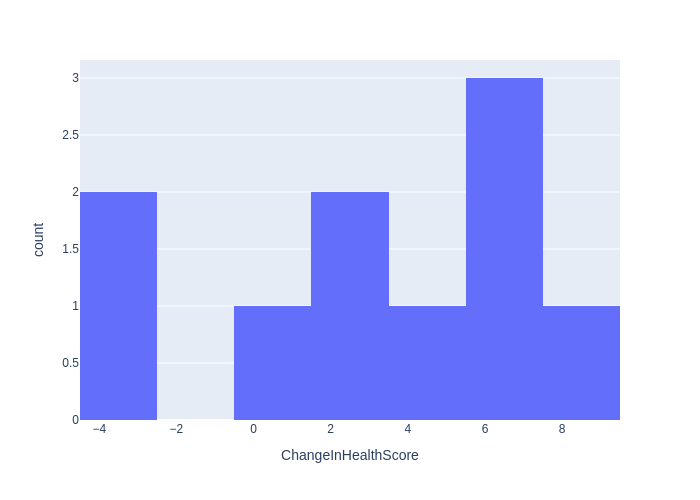

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff

np.random.seed(0)

vaccine_data = pd.read_csv('vaccine_data.csv')
vaccine_data['ChangeInHealthScore'] = vaccine_data['FinalHealthScore'] - vaccine_data['InitialHealthScore']

fig = px.histogram(vaccine_data, x="ChangeInHealthScore", nbins=10)
fig.show(renderer="png")

##### Initial sample observations  
From our histogram, there is not sufficient information to deduce whether our the vaccine has any effect or not. Most of the observations indicate there was some positive effect on the users health score, but some other observations indicate there was no effect or a negative effect on the users health score.

**So what can we do to determine whether we can reject the null hypothesis?**

##### Using bootstrapping 
Since our sample does not provide enough information, lets use the process of bootstrapping over many iterations to generate an interval with 95% confidence to determine whether there is sufficient reason to reject the null hypothesis.

In [4]:
initial_size = vaccine_data['ChangeInHealthScore'].size
number_of_samples = 10000
mean_health_scores = np.array([])

for _ in range(number_of_samples):
    data = np.random.choice(vaccine_data['ChangeInHealthScore'], initial_size)
    mean_health_scores = np.append(mean_health_scores, data.mean())


##### Explanation of code above  
In the code above, we simulate drawing 10,000 independent and identically distributed samples from our initial sample of the population, with identical size to our initial sample. Then we calculate and track mean of each generated sample. From this, we can create a histogram of the statistical sample means and find the interval that covers 95% of the sample means. Assuming our initial sample is unbiased and reflects the general population, we can determine the likelihood of our interval covering the null hypothesis with 95% confidence. 

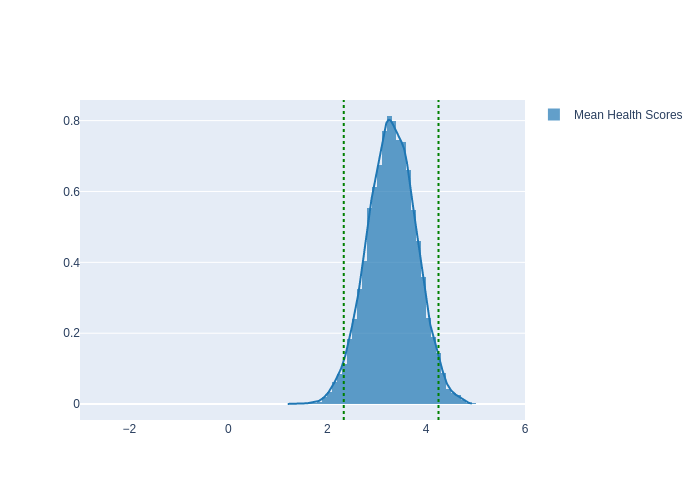

In [5]:
fig = ff.create_distplot([mean_health_scores], 
                         group_labels=['Mean Health Scores'], 
                         bin_size=0.1,
                         show_rug=False)

lower_bound = np.quantile(mean_health_scores, 0.025)
upper_bound = np.quantile(mean_health_scores, 0.975)

fig.add_vline(lower_bound, line_dash='dot', line_color='green')
fig.add_vline(upper_bound, line_dash='dot', line_color='green')

fig.update_layout(xaxis=dict(range=[-3, 6]))

fig.show(renderer="png")

##### Analysis of distribution of sample means  
The graph above is the distribution of our simulated sample mean. The two dotted green lines indicate the 2.5% and 97.5% upper and lower quantile locations. Using this, we can create an interval capturing 95% of our simulated data with the upper and lower bounds being the 2.5% and 97.5% quantile markings respectively. What do we notice about this range? The null hypothesis is not within the range, therefore we can reject the null hypothesis with 95% confidence as our confidence interval does not include 0 change in health scores.

##### Conclusion  
From bootstrapping, we have determined that we can reject the null hypothesis with 95% confidence. We can also conclude that by taking the vaccine, we can say with 95% confidence that the individual's health score will improve by anywhere between 3.35 and 4.25 points. Thus the vaccine proves to be effective at improving the overall health of the people who take it.

**Summary of Interaction for Q8**  
Here's a summary of our conversation:

Initial Code Discussion: You provided a code snippet to calculate the mean health scores from the vaccine_data and plot a histogram using Plotly. You wanted to add a Kernel Density Estimate (KDE) overlay.

KDE Overlay with Plotly: I provided an initial solution to overlay a KDE on the histogram using Seaborn to compute the KDE and then overlay it using Plotly.

Error Handling: You encountered a ValueError when attempting to calculate the bin width for the histogram. We modified the approach to calculate the bin width correctly, but this led to a TypeError.

Using Plotly Figure Factory: I then suggested using plotly.figure_factory to simplify the process of creating a histogram with a KDE overlay. This allowed you to use ff.create_distplot, which combines both in a single step.

KDE Mismatch Issues: You noted that decreasing the bin size of the histogram caused the KDE to no longer match the graph. We discussed reasons for this mismatch, including differences between the discreteness of histograms and the continuity of KDEs.

Adjusting Y-Axis: Finally, you asked how to manually set the y-axis for a ff.create_distplot. I provided an example using update_layout to specify the y-axis range.

If you need any more information or further assistance, feel free to ask!